# Random Forest Project

For this project we will be exploring publically available data from LendingClub.com lending club connects people who need money (borrower) with people who have money(investor) hopefully
as an investor you would want to invest in people who showed a profile of having a high
probablity of paying you back we will try to create a model that will help predict this relation

Lending club have a very interesting year in 2016 so let's check out some of their data and keep
the context in mind .this data is form before they even went public

we will use lending data from 2007-2010 and be trying to classify and predict whether or not be
borrower paid back their loan in full .you can download the data fro hereor just ure the csv
already provided..it's recommended you use the csv provided as it has been cleaned of NA
values

Here are what the columns represent

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
loans=pd.read_csv('loan_data.csv')

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratary Data Analysis

Let's do some visulization! We will use seaborn and pandas built in plotting capabilities butfeel free to use whatever library you want Don't worry about the color matching
just worry about getting the main idea of the plot

Create ahistogram of two Fico distributions on top of each other one for each credit.policy outcome


Note: This is pretty tricky feel free to reference the solution you will probably need one line of code for each histograph,I also recommend just using pandas in .hist()

Text(0.5, 0, 'FICO')


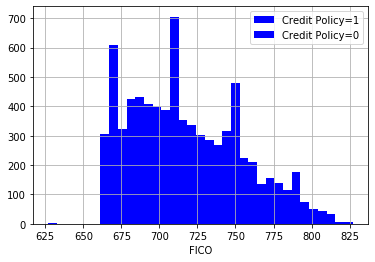

In [36]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='Credit Policy=1')
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='Credit Policy=0')
plt.legend()
p=plt.xlabel('FICO')
print(p)

Text(0.5, 0, 'FICO')

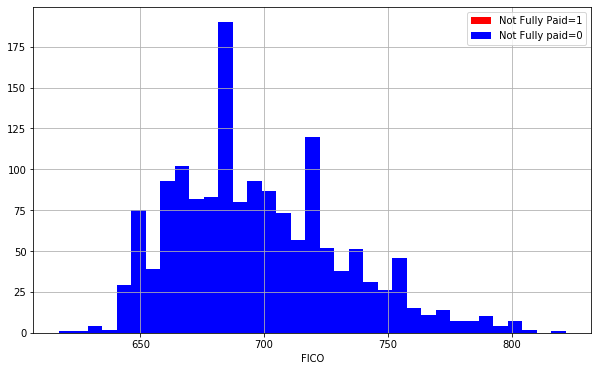

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='red',label='Not Fully Paid=1')
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='Not Fully paid=0')
plt.legend()
plt.xlabel('FICO')


#### Create a countplot using a seaborn showing the counts of loans by purpose,with the color hue defined by not.fully.paid

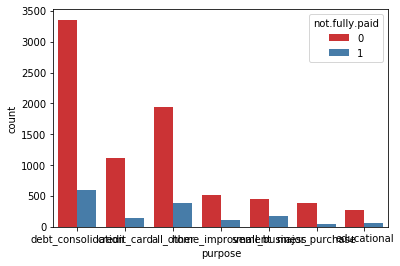

In [9]:
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

#### Let's see the trend between Fico score and interest rate Recreate the following jointplot

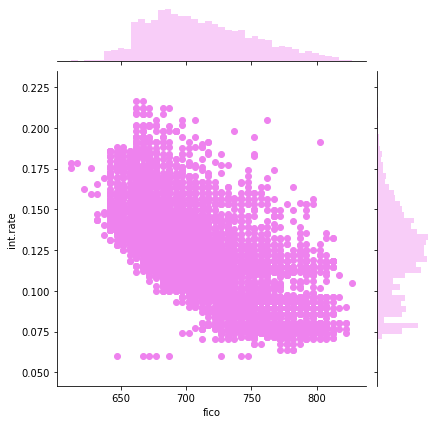

In [10]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='violet')

#### Create the following lmplot to see if the tren differed between not.fully.paid and credit.policy check the documentation for lmplot() if you can't figure out how to seperate it into columns

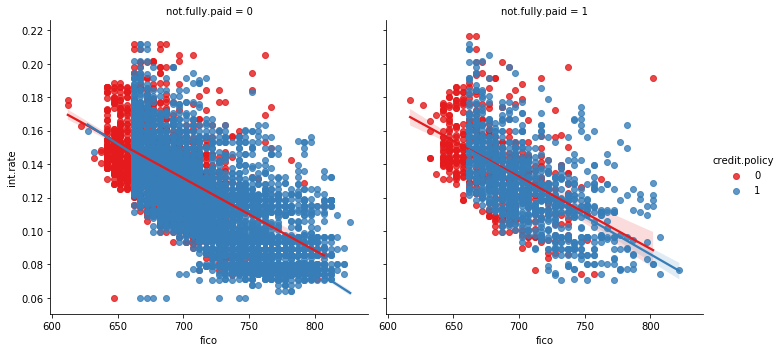

In [11]:
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy'
          ,col='not.fully.paid',palette='Set1')

###### Setting up the Data

Let's get ready to set up our data for our random Forest Classification Model!

# Check loans.info() again 

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [37]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Categorical Features

###### Notice that the purpose columns as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them .Let's do this in one clean
step using pg.get_dummies Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary

#### Create a list of 1 element containing the string 'purpose'.call this list cat_feat

In [13]:
cat_feats=['purpose']


#### Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger
dataframe that has new features columns with dummy variables.set this dataframe as final_data

In [14]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [15]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train Test Split

Now its time to split our data into a training set and a testing set!

##### Use sklean to split your data into a training set and a testing set as we'have done in the past

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [38]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

# Training a Decision tree Model

Let's start by training a single decision tree first!

#### Import a decision tree clssifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

#### create a instance of DecisiontreeClassifier() called dtree and fit it to the training data

In [20]:
dtree=DecisionTreeClassifier()

In [21]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predictions and Evaluation of decision tree

#### Create prediction from the test set and create a classification report and a confusion matrix

In [25]:
predictions=dtree.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2174  492]
 [ 376  119]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2666
           1       0.19      0.24      0.22       495

    accuracy                           0.73      3161
   macro avg       0.52      0.53      0.52      3161
weighted avg       0.75      0.73      0.74      3161



# Training the Random Forest model


Now its time to train our model!!

#### Create a instance of the randomforestClassifier class and fit it to our training data from the previous step

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
rfc=RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Prediction and Evaluation

Let's predict off the y_test values and evaluate our model

#### Predict the class of not.fully.paid for the x_test data

In [31]:
rfc_pred=rfc.predict(x_test)

#### Now create a classification report from the resullts. Do you get anything strange or some sort of warning?

In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2666
           1       0.48      0.03      0.05       495

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161



#### Show the confusion Matrix for the predictions

In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[2652   14]
 [ 482   13]]


#### What performed better the random forest for the decision tree?